In [10]:
import cv2
import numpy as np

# Read the image (replace 'your_image.jpg' with your image file)
img = cv2.imread('furina/furina.png')

# Convert to grayscale (if it's a color image)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
# Compute the 2D FFT using NumPy
f_transform = np.fft.fft2(gray_img)

In [12]:
# Shift the zero frequency component to the center
f_shift = np.fft.fftshift(f_transform)

In [13]:
# Calculate the magnitude spectrum
magnitude_spectrum = np.log(np.abs(f_shift) + 1) # Logarithmic scaling for better visualization
                                                 # Adding 1 to avoid log(0)

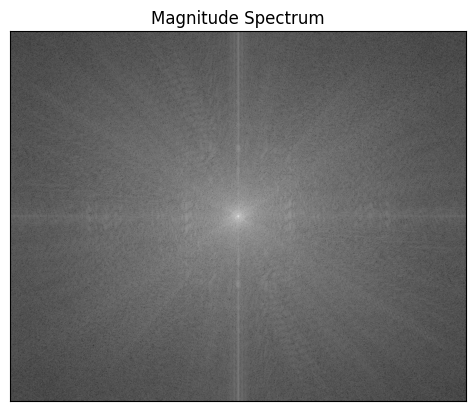

In [14]:
import matplotlib.pyplot as plt

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([]) # Hide axis ticks
plt.show()

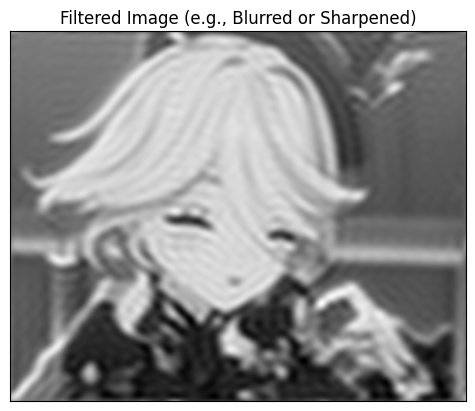

In [ ]:
# Example: Ideal Low-Pass Filter (for demonstration - might cause ringing artifacts)
rows, cols = gray_img.shape
crow, ccol = rows // 2, cols // 2  # Center coordinates

# Create a mask (all ones initially)
mask = np.ones((rows, cols), np.uint8)

# Set a region in the center to zero (attenuate high frequencies)
radius = 30 # Adjust radius for desired blur level
mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0

# Apply the mask to the shifted frequency spectrum
f_shift_filtered = f_shift * mask


#Steps 7 & 8 below to get back to spatial domain)
# Inverse shift to put zero frequency back to top-left
f_ishift = np.fft.ifftshift(f_shift_filtered)

# Step 8: Compute the Inverse 2D DFT to Get Back to the Spatial Domain
# Compute the inverse FFT
img_back = np.fft.ifft2(f_ishift)

# Get the real part (since the output might be complex due to numerical precision)
img_back = np.real(img_back)

# Normalize to the 0-255 range for display (optional, but often needed)
img_back = np.uint8(np.clip(img_back, 0, 255)) # Clip values to 0-255 range

plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image (e.g., Blurred or Sharpened)')
plt.xticks([]), plt.yticks([])
plt.show()    